In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving daisy.jpg to daisy (1).jpg


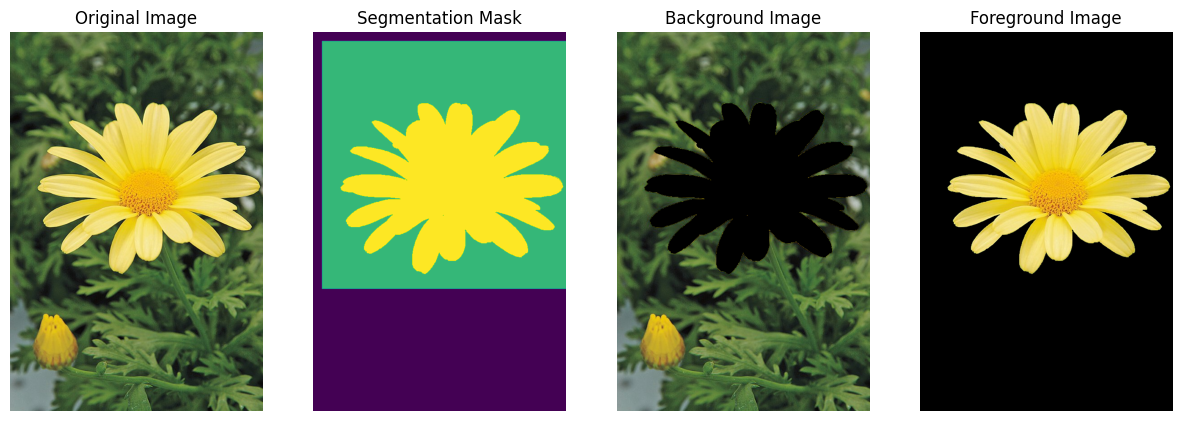

In [4]:
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

mask = np.zeros(image.shape[:2], np.uint8)
background = np.zeros((1, 65), np.float64)

rect = (20, 20, 550, 550)

cv2.grabCut(image, mask, rect, None, None, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0).astype('uint8')

foreground = cv2.bitwise_and(image, image, mask=mask2)
background = cv2.bitwise_and(image, image, mask=1 - mask2)

segmentation_mask = np.where(mask2[:, :, np.newaxis] == 1, 255, 0).astype('uint8')

# Display images using matplotlib
fig, ax = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(mask)
ax[1].set_title('Segmentation Mask')
ax[1].axis('off')

ax[2].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
ax[2].set_title('Background Image')
ax[2].axis('off')

ax[3].imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
ax[3].set_title('Foreground Image')
ax[3].axis('off')

plt.show()

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()


Saving daisy.jpg to daisy (2).jpg


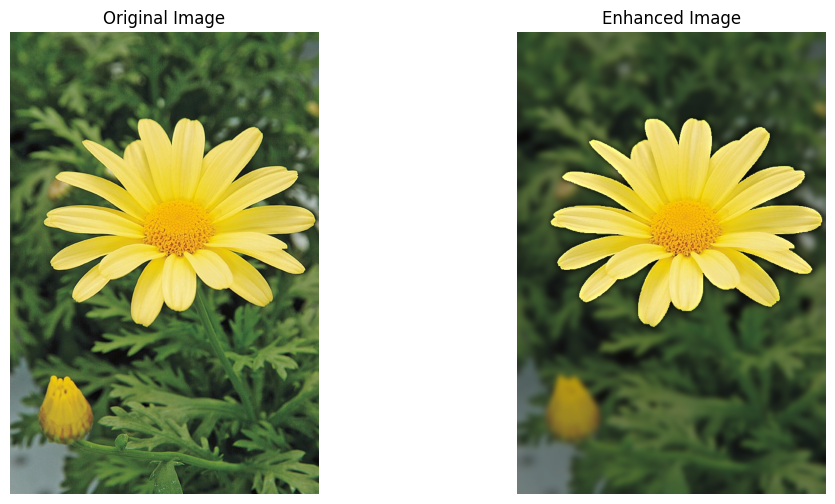

In [6]:
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

mask = np.zeros(image.shape[:2], np.uint8)
background = np.zeros((1, 65), np.float64)

rect = (20, 20, 550, 550)

cv2.grabCut(image, mask, rect, None, None, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0).astype('uint8')

foreground = cv2.bitwise_and(image, image, mask=mask2)
background = cv2.bitwise_and(image, image, mask=1 - mask2)
segmentation_mask = np.where(mask2[:, :, np.newaxis] == 1, 255, 0).astype('uint8')

blurred_bg = cv2.GaussianBlur(background, (31, 31), 0)
enhanced_img = cv2.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

# Display images using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Enhanced Image')
ax[1].axis('off')

plt.show()